In [18]:
%matplotlib inline
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [41]:
def create_image_dataframe(directory):
    image_dict = {}
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            parts = filename.split('_')
            identifier = parts[0]
            img_type = parts[1].split('.')[0]
            filepath = os.path.join(directory, filename)
            
            if identifier not in image_dict:
                image_dict[identifier] = {'init': None, 'final': None, 'goal': None}
            
            image_dict[identifier][img_type] = filepath
    
    # Filter out incomplete sets
    data = []
    for identifier, paths in image_dict.items():
        if all(paths.values()):  # Ensure all (init, final, goal) are present
            paths['identifier'] = identifier
            data.append(paths)
    
    df = pd.DataFrame(data)
    return df

df = create_image_dataframe('../../data/expert_images_star/')

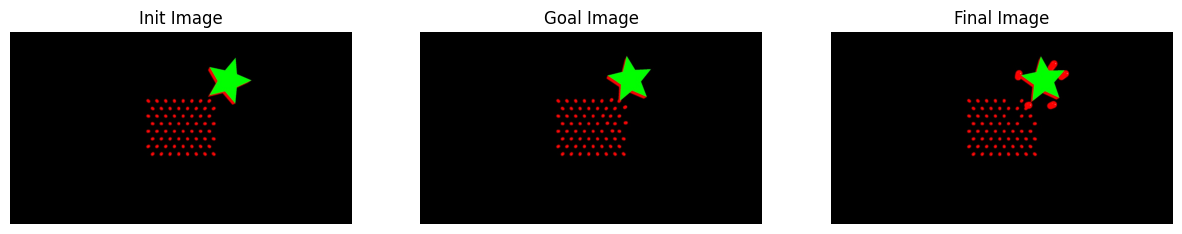

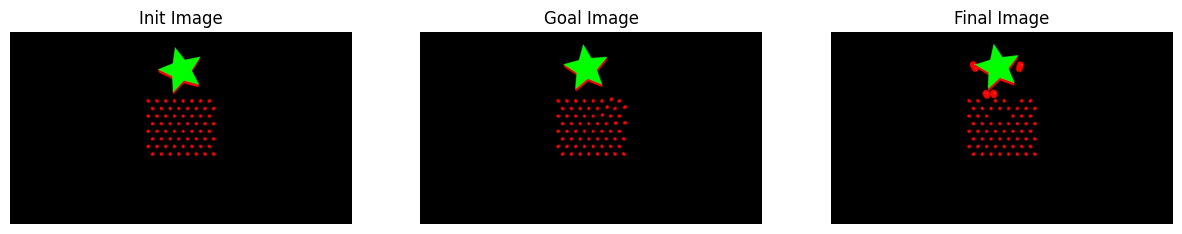

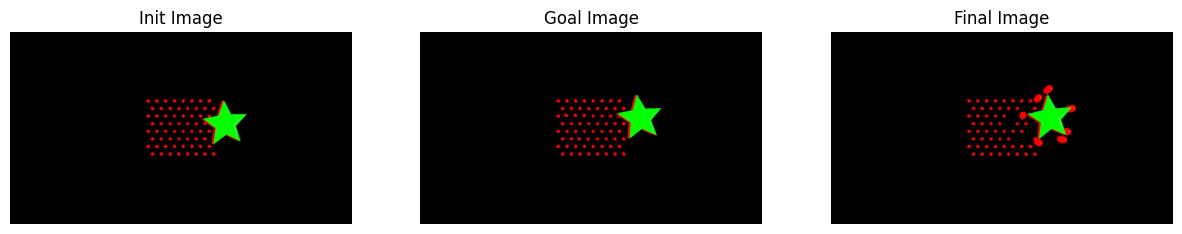

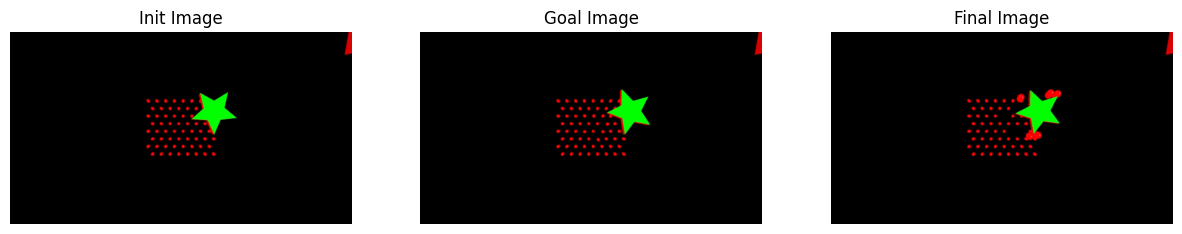

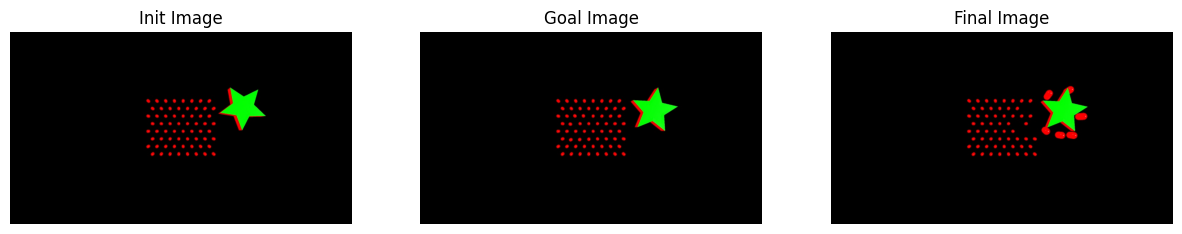

In [42]:
df = df.sample(frac=1).reset_index(drop=True)
for index, row in df.iterrows():
    if index == 5:
        break
    init_img = cv2.imread(row['init'])
    final_img = cv2.imread(row['final'])
    goal_img = cv2.imread(row['goal'])

    # plt.imshow(init_img)
    # plt.show()
    # plt.imshow(final_img)
    # plt.show()
    # plt.imshow(goal_img)
    # plt.show()

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot each image in a subplot
    axes[0].imshow(init_img)
    axes[0].set_title('Init Image')
    axes[0].axis('off')  # Hide the axis

    axes[2].imshow(final_img)
    axes[2].set_title('Final Image')
    axes[2].axis('off')  # Hide the axis

    axes[1].imshow(goal_img)
    axes[1].set_title('Goal Image')
    axes[1].axis('off')  # Hide the axis

    # Display the plot
    plt.show()  